# Preparacion

In [189]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [190]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape
clean_columns = []

## Encontrar variables con nulls rescatables

In [191]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)
     return continuas, discretas, categoricas

In [192]:

continuas, discretas, categoricas = getColumnTypes(dataHP)

In [193]:
cols_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean() > 0)]
cols_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [194]:
cols_rescatables = [col for col in cols_na if(dataHP[col].isnull().mean() <= 0.06)]

## Clasificar columnas segun tipo

In [195]:
continuous_na = [col for col in continuas if col in cols_rescatables ]
discrete_na = [col for col in discretas if col in cols_rescatables ]
categorical_na = [col for col in categoricas if col in cols_rescatables ]

# Imputacion de variables numericas

## Reemplazar con la media

In [206]:
dataHP[continuous_na].isnull().mean()

MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [208]:
fill_na_dict = {}
for col in continuous_na:
    fill_na_dict[col] = dataHP[col].mean()
dataHP.fillna(fill_na_dict,inplace=True)

In [209]:
dataHP[continuous_na].isnull().mean()

MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [212]:
# No hay columnas discretas rescatables
discrete_na

[]

# Imputacion variables categoricas

## Reemplazando con la moda

In [196]:
dataHP[categorical_na].isnull().mean()

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [197]:
fill_na_dict = {}
for col in categorical_na:
    fill_na_dict[col] = dataHP[col].mode()[0]
dataHP.fillna(fill_na_dict,inplace=True)

In [198]:
dataHP[categorical_na].isnull().mean()

MasVnrType      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

# Codificacion de variables categoricas

In [201]:
for colName in categorical_na:
     print(colName, ":", len(dataHP[colName].unique()))

MasVnrType : 4
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Electrical : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5


In [202]:
dataHP = pd.get_dummies(dataHP) 

In [203]:
dataHP_Categorical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


# Tratamiento de outliers

In [227]:
import scipy.stats as stats
import seaborn as sns
def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.histplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")  
        
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [216]:
for col in continuous_na:
    LI, LS = detectOutliersLimits(dataHP,  col)
    dataHP[f"{col}_Capping"] = np.where(dataHP[col] > LS, LS,
                                                                       np.where(dataHP[col] < LI, LI, dataHP[col]))

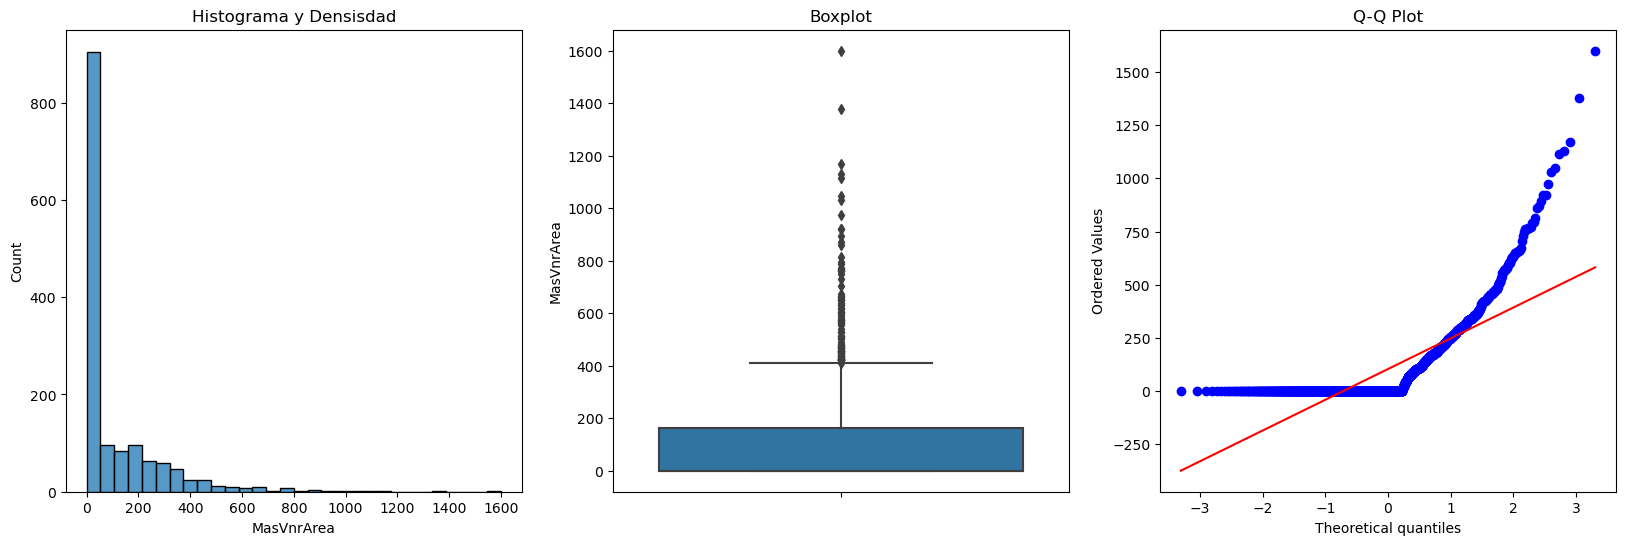

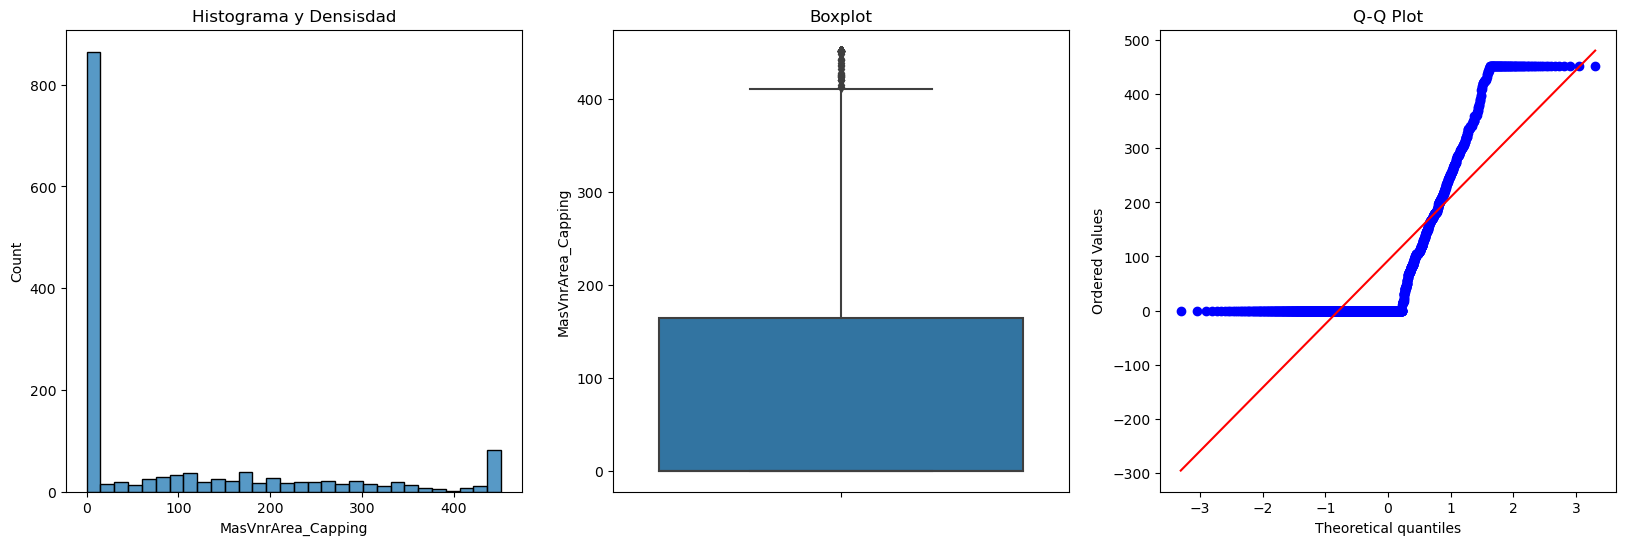

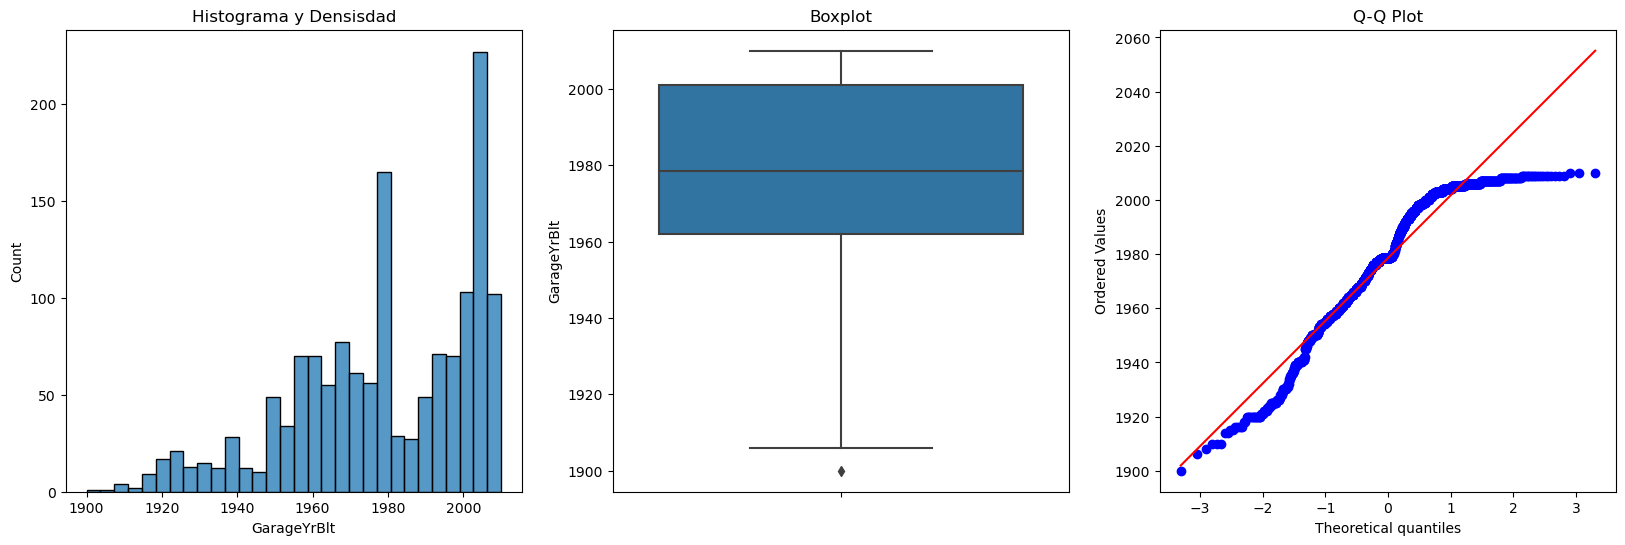

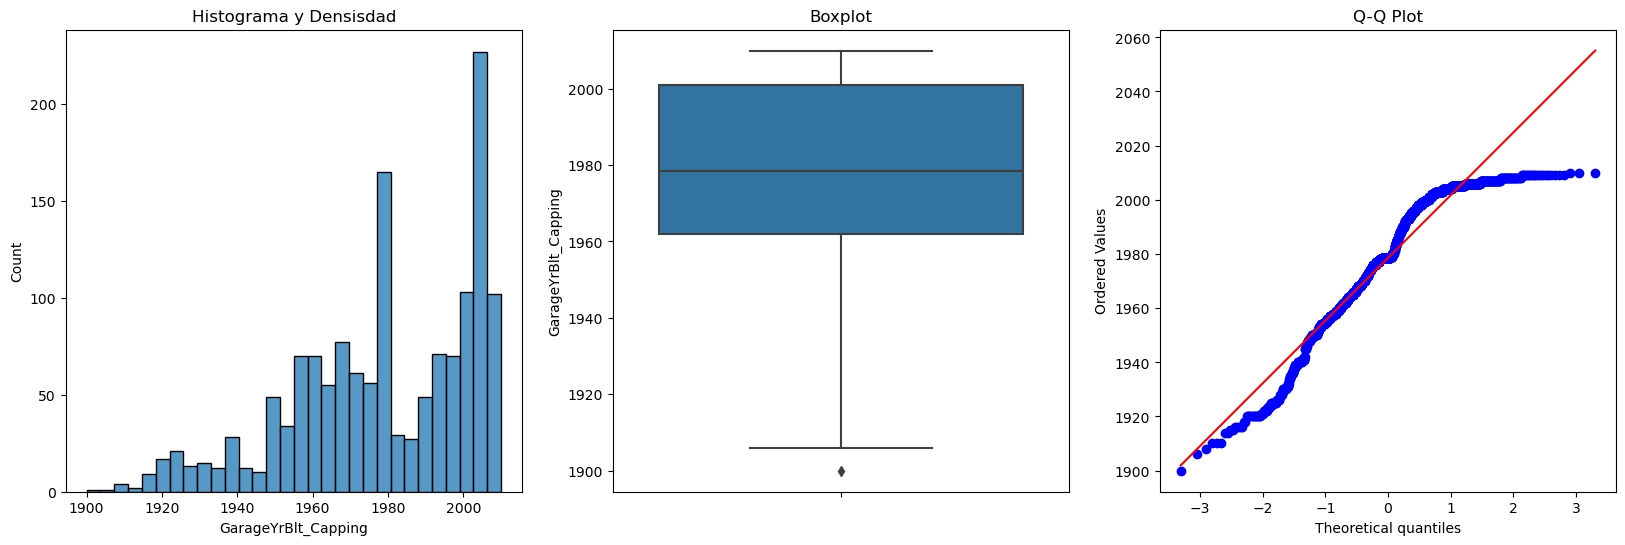

In [228]:
for col in continuous_na:
    plotDistBoxQQ(dataHP, col)
    plotDistBoxQQ(dataHP, f"{col}_Capping")